# Neural Spiking Data in Response to Transcranial Focused Ultrasound Stimulation

**IMPORTANT NOTICE**: This notebook was AI-generated using dandi-notebook-gen and has not been fully verified. Be cautious when interpreting the code or results. Always review the code and validate results before drawing scientific conclusions.

## Introduction

This notebook explores Dandiset 000945: "Neural Spiking Data in the Awake Rat Somatosensory Cortex Responding to Trials of Transcranial Focused Ultrasound Stimulation".

In these recordings, researchers tested different PRFs (pulse repetition frequencies) of ultrasound stimulation using a 128-element random array ultrasound transducer to stimulate the somatosensory cortex of awake head-fixed rats. Chronic electrophysiological recordings were acquired using 32-channel NeuroNexus electrodes (Model: A1x32-Poly3-10mm-50-177-Z32), chronically implanted into the rat brain. 

Key experimental parameters:
- Ultrasound stimulation delivered every ~2.5 seconds (with 10% jitter)
- 500 trials per recording
- PRFs tested: 30 Hz, 300 Hz, 1500 Hz, 3000 Hz, and 4500 Hz
- Pulse duration: 200 microseconds
- Ultrasound duration: 67 ms
- Some anesthetized recordings (2% isoflurane) for comparison

All 10 subjects were male rats, implanted with chronic electrodes at 6 months of age with recordings taken at 8-10 months and some follow-ups at 12 months. Each subject folder contains recordings for different PRFs, with most subjects having 5 recordings (one for each PRF).

## Setup

First, let's make sure we have all the necessary packages. Please install these packages if they are not already installed:
- pynwb
- lindi
- matplotlib
- numpy
- seaborn

In [1]:
import pynwb
import lindi
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dandi.dandiapi import DandiAPIClient

# Set seaborn style
sns.set_theme()

## Accessing the Dandiset

We use the DANDI API to access the Dandiset and list its assets (NWB files).

In [2]:
# Initialize DANDI API client and get the Dandiset
client = DandiAPIClient()
dandiset = client.get_dandiset("000945")
metadata = dandiset.get_metadata()
print(f"Dandiset ID: {dandiset.identifier}")
print(f"Dandiset version: {dandiset.version}")

# Get all assets in the Dandiset
print("\nFetching assets...")
assets = list(dandiset.get_assets())
print(f"Number of assets: {len(assets)}")

# Display a few assets to see the file structure
print("\nSample assets:")
for asset in assets[:5]:
    print(f"  {asset.path} ({asset.size/1024:.1f} KB)")

Dandiset ID: 000945
Dandiset version: 0.250213.2212

Fetching assets...
Number of assets: 75

Sample assets:
  sub-BH498/sub-BH498_ses-20240306T124227_ecephys.nwb (1635.5 KB)
  sub-BH498/sub-BH498_ses-20240305T200606_ecephys.nwb (2495.8 KB)
  sub-BH498/sub-BH498_ses-20240305T191833_ecephys.nwb (5455.9 KB)
  sub-BH498/sub-BH498_ses-20230906T180913_ecephys.nwb (6579.0 KB)
  sub-BH498/sub-BH498_ses-20240305T204552_ecephys.nwb (4193.0 KB)


## Understanding the Data Structure

Let's first examine the subjects and organize the files by subject. This will help us get a better understanding of the dataset's organization.

In [3]:
# Organize files by subject
subjects = {}
for asset in assets:
    path = asset.path
    subject_id = path.split('/')[0].replace('sub-', '')
    
    if subject_id not in subjects:
        subjects[subject_id] = []
    
    subjects[subject_id].append({
        'path': path,
        'size': asset.size,
        'asset_id': asset.identifier
    })

# Print the number of files per subject
print("Number of files per subject:")
for subject, files in subjects.items():
    print(f"  Subject {subject}: {len(files)} files")

Number of files per subject:
  Subject BH498: 13 files
  Subject BH506: 9 files
  Subject BH508: 10 files
  Subject BH512: 12 files
  Subject BH519: 5 files
  Subject BH521: 5 files
  Subject BH526: 7 files
  Subject BH527: 5 files
  Subject BH497: 5 files
  Subject BH514: 4 files


Now, let's look closer at the identifiers of the files to understand which PRFs were tested for each subject.

In [4]:
# Function to load NWB file and get basic info
def get_nwb_basic_info(asset_id):
    # Construct Lindi URL
    lindi_url = f"https://lindi.neurosift.org/dandi/dandisets/000945/assets/{asset_id}/nwb.lindi.json"
    
    # Load file
    f = lindi.LindiH5pyFile.from_lindi_file(lindi_url)
    nwb = pynwb.NWBHDF5IO(file=f, mode='r').read()
    
    # Extract basic info
    info = {
        'identifier': nwb.identifier,
        'session_description': nwb.session_description,
        'subject_id': nwb.subject.subject_id,
        'num_units': len(nwb.units['id'].data),
        'num_trials': len(nwb.intervals["trials"]['id'])
    }
    
    return info

# Let's examine a few files from different subjects
sample_subjects = list(subjects.keys())[:3]  # Take 3 subjects
subject_info = {}

print("Examining files from sample subjects:")
for subject in sample_subjects:
    # Take first file from each subject
    asset_id = subjects[subject][0]['asset_id']
    path = subjects[subject][0]['path']
    
    print(f"\nLoading {path}...")
    info = get_nwb_basic_info(asset_id)
    print(f"  Identifier: {info['identifier']}")
    print(f"  Description: {info['session_description']}")
    print(f"  Subject ID: {info['subject_id']}")
    print(f"  Number of units: {info['num_units']}")
    print(f"  Number of trials: {info['num_trials']}")
    
    subject_info[subject] = info

Examining files from sample subjects:

Loading sub-BH498/sub-BH498_ses-20240306T124227_ecephys.nwb...


/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.5.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.1.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


  Identifier: BH498_1500_200
  Description: Awake S1 Stimulation by tFUS
  Subject ID: BH498
  Number of units: 37
  Number of trials: 500

Loading sub-BH506/sub-BH506_ses-20231026T155106_ecephys.nwb...


  Identifier: BH506_4500_200
  Description: Awake S1 Stimulation by tFUS
  Subject ID: BH506
  Number of units: 64
  Number of trials: 500

Loading sub-BH508/sub-BH508_ses-20230827T172257_ecephys.nwb...


  Identifier: BH508_4500_200
  Description: Awake S1 Stimulation by tFUS
  Subject ID: BH508
  Number of units: 71
  Number of trials: 500


Based on the file identifiers, we can see that they contain information about the PRF used in each recording. For example, "BH498_3000_200" appears to indicate a recording from subject BH498 with a PRF of 3000 Hz and pulse duration of 200 microseconds.

Let's analyze the identifier naming pattern to understand which PRFs were tested across the dataset.

In [5]:
# Function to extract experimental parameters from identifier
def parse_identifier(identifier):
    parts = identifier.split('_')
    
    if len(parts) < 3:
        return {
            'subject': parts[0],
            'prf': None,
            'pulse_duration': None,
            'anesthetized': False
        }
    
    params = {
        'subject': parts[0],
        'prf': int(parts[1]) if parts[1].isdigit() else None,
        'pulse_duration': int(parts[2]) if parts[2].isdigit() else None,
        'anesthetized': 'anes' in parts if len(parts) > 3 else False
    }
    
    return params

# Let's analyze identifiers from the sample files
print("Analyzing experimental parameters from identifiers:")
for subject, info in subject_info.items():
    params = parse_identifier(info['identifier'])
    print(f"\n{info['identifier']}:")
    print(f"  Subject: {params['subject']}")
    print(f"  PRF: {params['prf']} Hz")
    print(f"  Pulse Duration: {params['pulse_duration']} µs")
    print(f"  Anesthetized: {'Yes' if params['anesthetized'] else 'No'}")

Analyzing experimental parameters from identifiers:

BH498_1500_200:
  Subject: BH498
  PRF: 1500 Hz
  Pulse Duration: 200 µs
  Anesthetized: No

BH506_4500_200:
  Subject: BH506
  PRF: 4500 Hz
  Pulse Duration: 200 µs
  Anesthetized: No

BH508_4500_200:
  Subject: BH508
  PRF: 4500 Hz
  Pulse Duration: 200 µs
  Anesthetized: No


## Examining a Single NWB File

Now, let's examine the content of a single NWB file in detail to understand the data structure. We'll choose a file from subject BH498 with a PRF of 3000 Hz.

In [6]:
# Choose a file to analyze in detail
asset_id = subjects["BH498"][0]['asset_id']  # First file from BH498
file_path = subjects["BH498"][0]['path']
print(f"Analyzing file: {file_path}")

# Load the file using lindi
lindi_url = f"https://lindi.neurosift.org/dandi/dandisets/000945/assets/{asset_id}/nwb.lindi.json"
f = lindi.LindiH5pyFile.from_lindi_file(lindi_url)
nwb = pynwb.NWBHDF5IO(file=f, mode='r').read()

# Print basic file info
print("\nFile basic info:")
print(f"Session Description: {nwb.session_description}")
print(f"Identifier: {nwb.identifier}")
print(f"Session Start Time: {nwb.session_start_time}")
print(f"Institution: {nwb.institution}")

# Print subject info
print("\nSubject info:")
print(f"Subject ID: {nwb.subject.subject_id}")
print(f"Age: {nwb.subject.age}")
print(f"Sex: {nwb.subject.sex}")
print(f"Species: {nwb.subject.species}")
print(f"Description: {nwb.subject.description}")

Analyzing file: sub-BH498/sub-BH498_ses-20240306T124227_ecephys.nwb



File basic info:
Session Description: Awake S1 Stimulation by tFUS
Identifier: BH498_1500_200
Session Start Time: 2024-03-06 12:42:27-05:00
Institution: Carnegie Mellon University

Subject info:
Subject ID: BH498
Age: P24W
Sex: M
Species: Rattus norvegicus
Description: HSD:WI rat


Let's explore the trials information, which represents the ultrasound stimulation events.

Number of trials: 500

First 5 trials:
Trial 1: start=0.298s, stop=2.498s, duration=2.200s
Trial 2: start=2.864s, stop=5.064s, duration=2.200s
Trial 3: start=5.137s, stop=7.337s, duration=2.200s
Trial 4: start=7.421s, stop=9.621s, duration=2.200s
Trial 5: start=9.945s, stop=12.145s, duration=2.200s

Inter-trial interval statistics (first 19 intervals):
Mean: 2.499 seconds
Min: 2.273 seconds
Max: 2.714 seconds


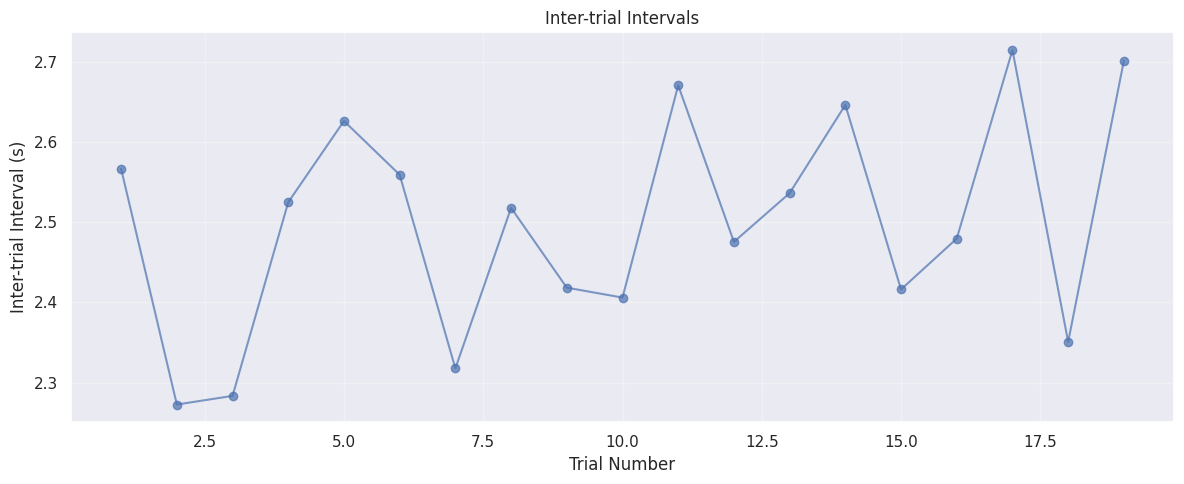

In [7]:
# Get trials information
trials = nwb.intervals["trials"]
print(f"Number of trials: {len(trials['id'])}")

# Display first few trial timings
num_samples = 5
start_times = trials['start_time'][:num_samples]
stop_times = trials['stop_time'][:num_samples]
durations = stop_times - start_times

print(f"\nFirst {num_samples} trials:")
for i in range(num_samples):
    print(f"Trial {i+1}: start={start_times[i]:.3f}s, stop={stop_times[i]:.3f}s, duration={durations[i]:.3f}s")

# Calculate inter-trial intervals (time between trial starts)
iti = trials['start_time'][1:20] - trials['start_time'][:19]  # First 19 intervals

print("\nInter-trial interval statistics (first 19 intervals):")
print(f"Mean: {np.mean(iti):.3f} seconds")
print(f"Min: {np.min(iti):.3f} seconds")
print(f"Max: {np.max(iti):.3f} seconds")

# Plot trial timing
plt.figure(figsize=(12, 5))
plt.plot(range(1, len(iti)+1), iti, 'o-', alpha=0.7)
plt.xlabel('Trial Number')
plt.ylabel('Inter-trial Interval (s)')
plt.title('Inter-trial Intervals')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

Now, let's explore information about the electrodes.

In [8]:
# Get electrode information
electrodes = nwb.electrodes
print(f"Number of electrodes: {len(electrodes['id'])}")
print(f"Electrode columns: {electrodes.colnames}")

# Display information for a few electrodes
num_samples = 5
print(f"\nSample of {num_samples} electrodes:")
for i in range(min(num_samples, len(electrodes['id']))):
    print(f"Electrode {i}:")
    print(f"  Location: {electrodes['location'][i]}")
    print(f"  Group: {electrodes['group_name'][i]}")
    print(f"  X, Y, Z: {electrodes['x'][i]}, {electrodes['y'][i]}, {electrodes['z'][i]}")

Number of electrodes: 32
Electrode columns: ('x', 'y', 'z', 'imp', 'location', 'filtering', 'group', 'group_name')

Sample of 5 electrodes:
Electrode 0:
  Location: unknown
  Group: shank1elec1
  X, Y, Z: 1.0, 10.0, 0.0
Electrode 1:
  Location: unknown
  Group: shank1elec2
  X, Y, Z: 1.0, 11.0, 0.0
Electrode 2:
  Location: unknown
  Group: shank1elec3
  X, Y, Z: 1.0, 9.0, 0.0
Electrode 3:
  Location: unknown
  Group: shank1elec4
  X, Y, Z: 1.0, 8.0, 0.0
Electrode 4:
  Location: unknown
  Group: shank1elec5
  X, Y, Z: 1.0, 7.0, 0.0


Next, let's explore the unit (neuron) data.

Number of units: 37
Unit columns: ('spike_times', 'celltype_label')

Cell types: [1. 2.]
Count per cell type: [25 12]


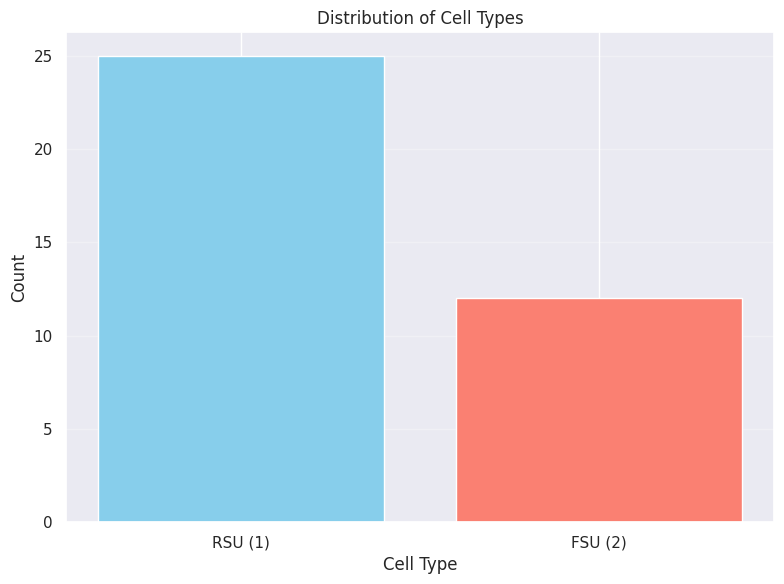

In [9]:
# Get unit information
units = nwb.units
print(f"Number of units: {len(units['id'].data)}")
print(f"Unit columns: {units.colnames}")

# Count units by cell type
cell_types = units['celltype_label'].data[:]
unique_types, type_counts = np.unique(cell_types, return_counts=True)
print(f"\nCell types: {unique_types}")
print(f"Count per cell type: {type_counts}")

# Plot cell type distribution
plt.figure(figsize=(8, 6))
plt.bar([1, 2], type_counts, color=['skyblue', 'salmon'], tick_label=['RSU (1)', 'FSU (2)'])
plt.xlabel('Cell Type')
plt.ylabel('Count')
plt.title('Distribution of Cell Types')
plt.grid(alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

Let's examine the spike times for a few units to understand the neural activity patterns.

RSU spike count range: 1080 - 15277
FSU spike count range: 1664 - 15141


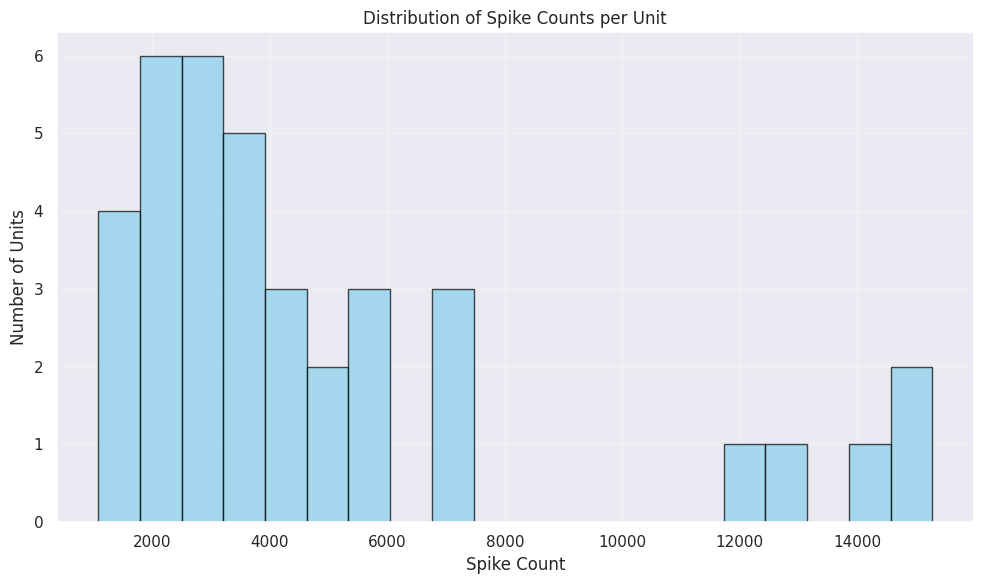

In [10]:
# Sample a few units of each type
rsu_indices = np.where(cell_types == 1.0)[0]
fsu_indices = np.where(cell_types == 2.0)[0]

# Get spike counts for all units
spike_counts = np.array([len(units['spike_times'][i]) for i in range(len(units['id'].data))])

print(f"RSU spike count range: {np.min(spike_counts[rsu_indices]):.0f} - {np.max(spike_counts[rsu_indices]):.0f}")
print(f"FSU spike count range: {np.min(spike_counts[fsu_indices]):.0f} - {np.max(spike_counts[fsu_indices]):.0f}")

# Plot spike count distribution
plt.figure(figsize=(10, 6))
plt.hist(spike_counts, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Spike Count')
plt.ylabel('Number of Units')
plt.title('Distribution of Spike Counts per Unit')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## Analyzing Neural Responses to Ultrasound Stimulation

Now, let's analyze how neurons respond to the focused ultrasound stimulation by creating peri-stimulus time histograms (PSTHs). This will allow us to visualize changes in firing rates around stimulation events.

In [11]:
# Function to compute PSTH
def compute_psth(spike_times, event_times, window_size=2.0, bin_size=0.05):
    time_bins = np.arange(-window_size, window_size + bin_size, bin_size)
    psth = np.zeros(len(time_bins) - 1)
    
    # Loop through each stimulus event
    for event_time in event_times:
        # Find spikes within the window around this event
        window_spikes = spike_times[(spike_times >= event_time - window_size) & 
                                  (spike_times <= event_time + window_size)]
        
        # Convert spike times to times relative to event
        relative_times = window_spikes - event_time
        
        # Bin the spikes
        hist, _ = np.histogram(relative_times, bins=time_bins)
        psth += hist
    
    # Normalize by number of trials and bin size to get firing rate in Hz
    psth = psth / (len(event_times) * bin_size)
    return psth, time_bins

# Parameters for PSTH
window_size = 2.0  # seconds around stimulation
bin_size = 0.05    # 50 ms bins

# Get trial start times (stimulation onset)
stim_times = trials['start_time'][:]

# Sample a subset of trials to speed up processing
trial_subset = np.random.choice(len(stim_times), size=min(100, len(stim_times)), replace=False)
stim_times_subset = stim_times[trial_subset]

# Sample a few units from each cell type
num_samples = 3
rsu_samples = np.random.choice(rsu_indices, size=min(num_samples, len(rsu_indices)), replace=False)
fsu_samples = np.random.choice(fsu_indices, size=min(num_samples, len(fsu_indices)), replace=False)

Let's create PSTHs for a few example Regular-Spiking Units (RSUs).

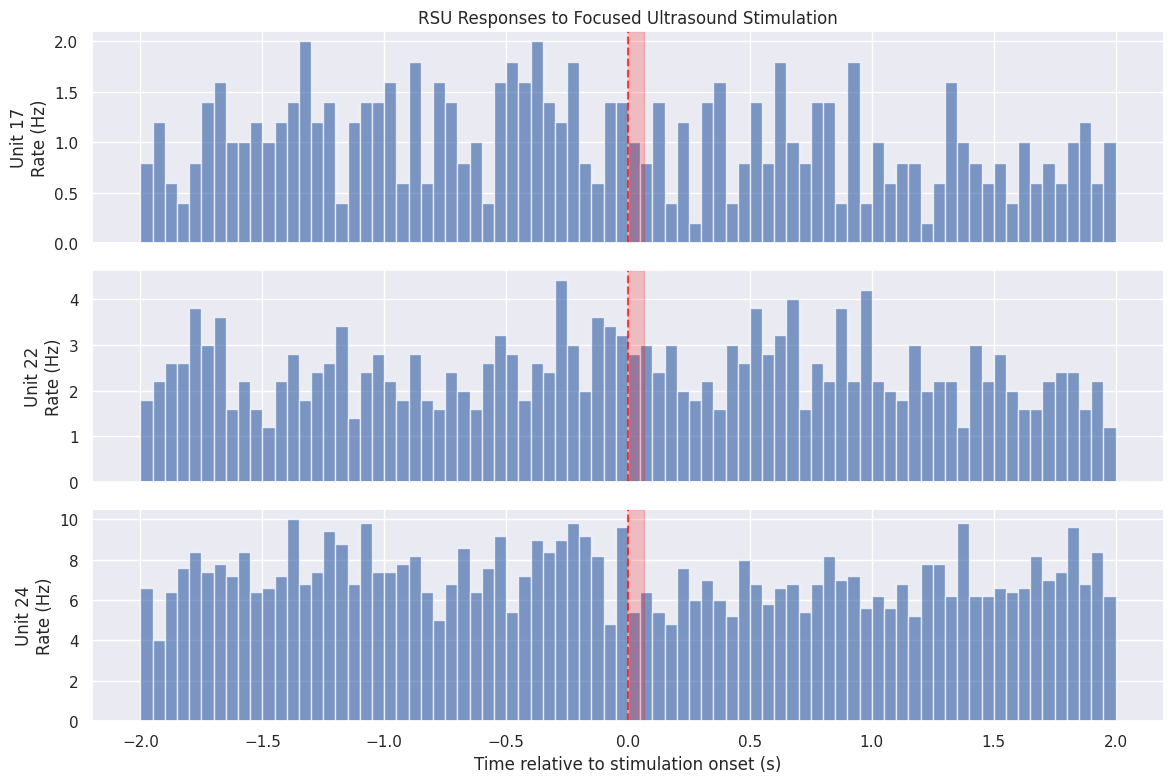

In [12]:
# Compute and plot PSTHs for sample RSUs
fig, axes = plt.subplots(num_samples, 1, figsize=(12, 8), sharex=True)
bin_centers = np.arange(-window_size, window_size, bin_size) + bin_size/2

for i, unit_idx in enumerate(rsu_samples):
    # Get spike times for this unit
    spike_times = units['spike_times'][unit_idx][:]
    
    # Compute PSTH
    psth, time_bins = compute_psth(spike_times, stim_times_subset, window_size, bin_size)
    
    # Plot
    axes[i].bar(bin_centers, psth, width=bin_size, alpha=0.7)
    axes[i].axvline(x=0, color='red', linestyle='--', alpha=0.7)
    axes[i].axvspan(0, 0.067, alpha=0.2, color='red')  # Highlight 67ms stimulation duration
    axes[i].set_ylabel(f"Unit {units['id'].data[unit_idx]}\nRate (Hz)")
    
    if i == 0:
        axes[i].set_title("RSU Responses to Focused Ultrasound Stimulation")
    
    if i == num_samples - 1:
        axes[i].set_xlabel("Time relative to stimulation onset (s)")

plt.tight_layout()
plt.show()

Now, let's create PSTHs for a few example Fast-Spiking Units (FSUs).

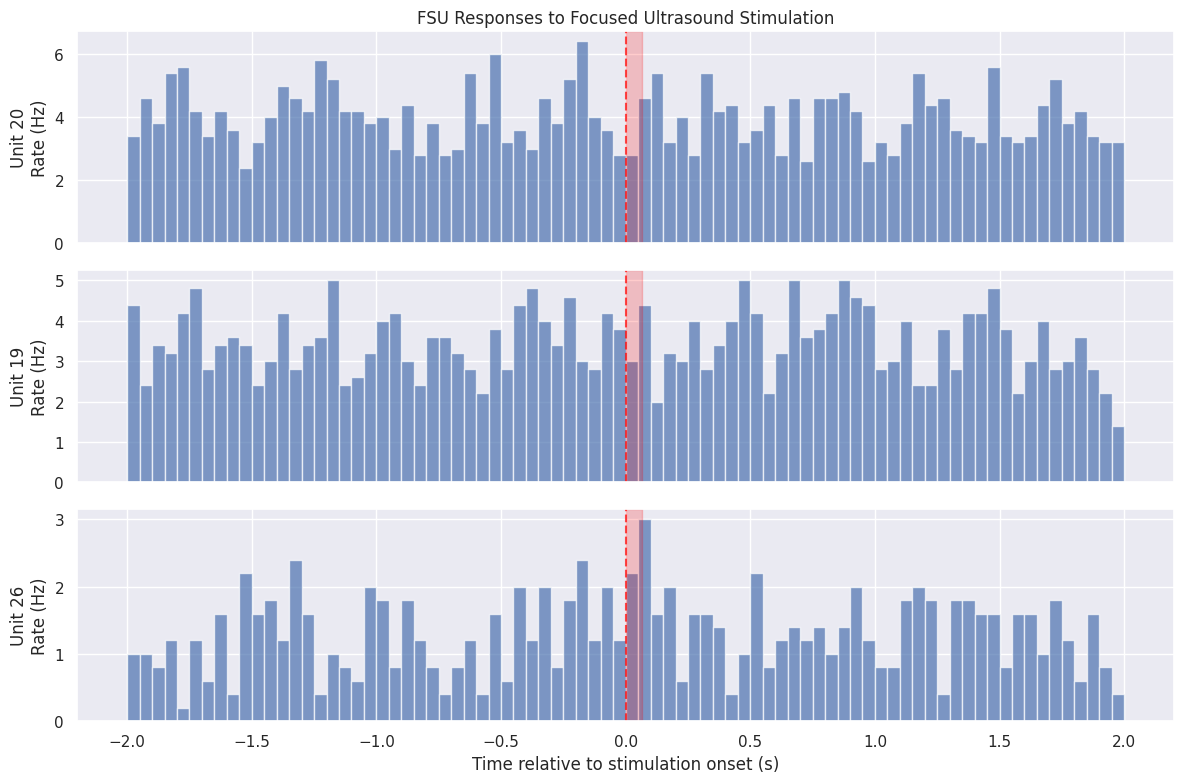

In [13]:
# Compute and plot PSTHs for sample FSUs
fig, axes = plt.subplots(num_samples, 1, figsize=(12, 8), sharex=True)

for i, unit_idx in enumerate(fsu_samples):
    # Get spike times for this unit
    spike_times = units['spike_times'][unit_idx][:]
    
    # Compute PSTH
    psth, time_bins = compute_psth(spike_times, stim_times_subset, window_size, bin_size)
    
    # Plot
    axes[i].bar(bin_centers, psth, width=bin_size, alpha=0.7)
    axes[i].axvline(x=0, color='red', linestyle='--', alpha=0.7)
    axes[i].axvspan(0, 0.067, alpha=0.2, color='red')  # Highlight 67ms stimulation duration
    axes[i].set_ylabel(f"Unit {units['id'].data[unit_idx]}\nRate (Hz)")
    
    if i == 0:
        axes[i].set_title("FSU Responses to Focused Ultrasound Stimulation")
    
    if i == num_samples - 1:
        axes[i].set_xlabel("Time relative to stimulation onset (s)")

plt.tight_layout()
plt.show()

Let's calculate the average response across RSUs and FSUs to get a more general picture of how these cell types respond to stimulation.

Calculating average neural responses...


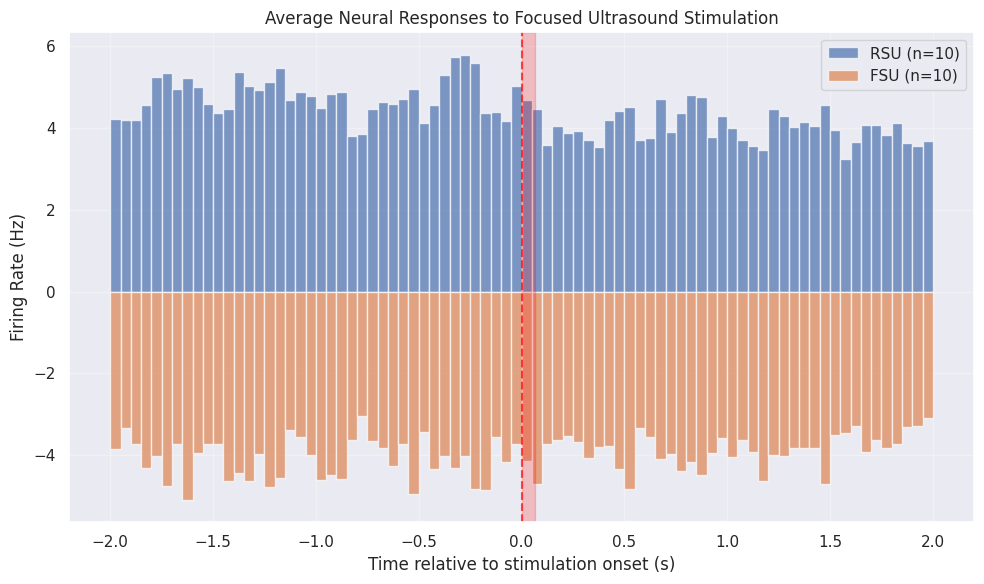

In [14]:
# Calculate average response across cell types
# Sample a subset of units for the average to speed up processing
rsu_avg_sample = np.random.choice(rsu_indices, size=min(10, len(rsu_indices)), replace=False)
fsu_avg_sample = np.random.choice(fsu_indices, size=min(10, len(fsu_indices)), replace=False)

# Function to compute average PSTH for a set of units
def compute_avg_psth(unit_indices, stim_times):
    all_psths = []
    for unit_idx in unit_indices:
        spike_times = units['spike_times'][unit_idx][:]
        psth, _ = compute_psth(spike_times, stim_times, window_size, bin_size)
        all_psths.append(psth)
    return np.mean(all_psths, axis=0) if all_psths else np.zeros(len(bin_centers))

# Compute average responses
print("Calculating average neural responses...")
avg_rsu_psth = compute_avg_psth(rsu_avg_sample, stim_times_subset)
avg_fsu_psth = compute_avg_psth(fsu_avg_sample, stim_times_subset)

# Plot average responses
plt.figure(figsize=(10, 6))
plt.bar(bin_centers, avg_rsu_psth, width=bin_size, alpha=0.7, label=f'RSU (n={len(rsu_avg_sample)})')
plt.bar(bin_centers, -avg_fsu_psth, width=bin_size, alpha=0.7, label=f'FSU (n={len(fsu_avg_sample)})')
plt.axvline(x=0, color='red', linestyle='--', alpha=0.7)
plt.axvspan(0, 0.067, alpha=0.2, color='red')  # Highlight 67ms stimulation duration
plt.ylabel("Firing Rate (Hz)")
plt.xlabel("Time relative to stimulation onset (s)")
plt.title("Average Neural Responses to Focused Ultrasound Stimulation")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## Comparing Responses Across Different PRFs

The Dandiset contains recordings with different PRFs (pulse repetition frequencies): 30 Hz, 300 Hz, 1500 Hz, 3000 Hz, and 4500 Hz. To fully understand how PRF affects neural responses, we would need to analyze multiple files. 

Below, we demonstrate how to load and compare data from a different file with a different PRF.

In [15]:
# Let's find a file with a different PRF for comparison
# For this example, let's find a file with PRF 1500 Hz
target_prf = 1500

# Find a file with target PRF
target_file = None
for subject, files in subjects.items():
    for file_info in files:
        asset_id = file_info['asset_id']
        path = file_info['path']
        
        # Skip if already analyzed
        if asset_id == subjects["BH498"][0]['asset_id']:
            continue
        
        try:
            # Get lindi URL
            lindi_url = f"https://lindi.neurosift.org/dandi/dandisets/000945/assets/{asset_id}/nwb.lindi.json"
            
            # Attempt to load file
            f = lindi.LindiH5pyFile.from_lindi_file(lindi_url)
            nwb_test = pynwb.NWBHDF5IO(file=f, mode='r').read()
            
            # Check identifier
            identifier = nwb_test.identifier
            params = parse_identifier(identifier)
            
            if params['prf'] == target_prf:
                target_file = {
                    'asset_id': asset_id,
                    'path': path,
                    'identifier': identifier
                }
                print(f"Found file with PRF {target_prf} Hz: {path}")
                print(f"Identifier: {identifier}")
                break
                
        except Exception as e:
            print(f"Error loading {path}: {e}")
            continue
            
    if target_file:
        break

Found file with PRF 1500 Hz: sub-BH498/sub-BH498_ses-20240305T200606_ecephys.nwb
Identifier: BH498_1500_200_2


/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.5.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.1.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


Now that we've found a file with a different PRF, let's load it and compare some neural responses.

Loading file with PRF 1500 Hz: sub-BH498/sub-BH498_ses-20240305T200606_ecephys.nwb


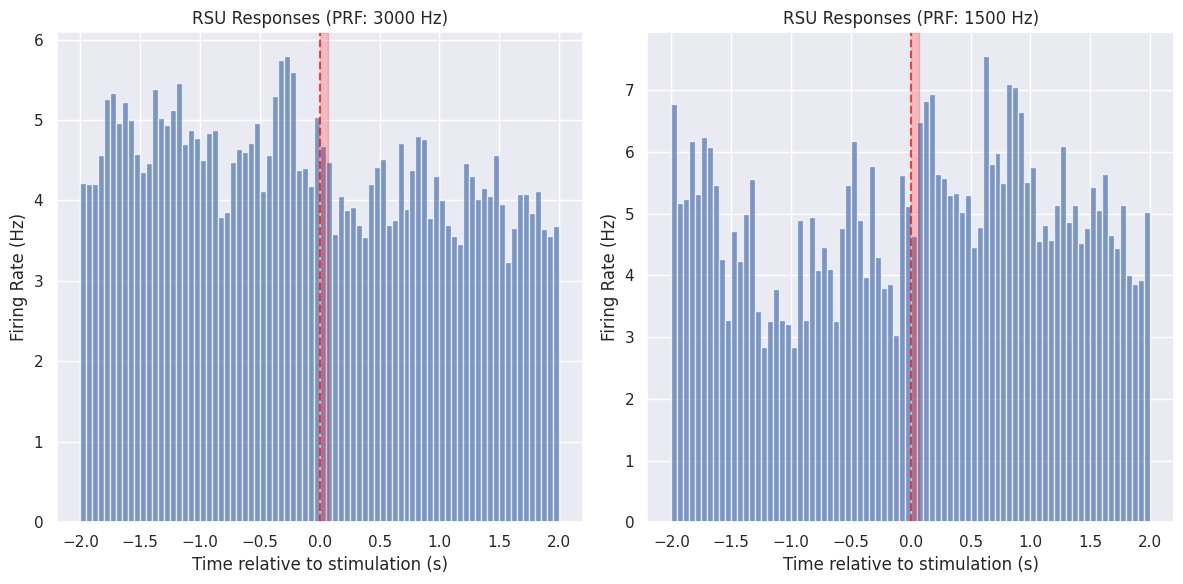

In [16]:
if target_file:
    print(f"Loading file with PRF {target_prf} Hz: {target_file['path']}")
    
    # Load the file
    lindi_url = f"https://lindi.neurosift.org/dandi/dandisets/000945/assets/{target_file['asset_id']}/nwb.lindi.json"
    f2 = lindi.LindiH5pyFile.from_lindi_file(lindi_url)
    nwb2 = pynwb.NWBHDF5IO(file=f2, mode='r').read()
    
    # Get trials and units
    trials2 = nwb2.intervals["trials"]
    units2 = nwb2.units
    
    # Get stimulation times
    stim_times2 = trials2['start_time'][:]
    trial_subset2 = np.random.choice(len(stim_times2), size=min(100, len(stim_times2)), replace=False)
    stim_times_subset2 = stim_times2[trial_subset2]
    
    # Get cell types
    cell_types2 = units2['celltype_label'].data[:]
    rsu_indices2 = np.where(cell_types2 == 1.0)[0]
    fsu_indices2 = np.where(cell_types2 == 2.0)[0]
    
    # Sample units
    rsu_avg_sample2 = np.random.choice(rsu_indices2, size=min(10, len(rsu_indices2)), replace=False)
    
    # Calculate PSTH for RSUs
    avg_rsu_psth2 = np.zeros(len(bin_centers))
    for unit_idx in rsu_avg_sample2:
        spike_times = units2['spike_times'][unit_idx][:]
        psth, _ = compute_psth(spike_times, stim_times_subset2, window_size, bin_size)
        avg_rsu_psth2 += psth
    avg_rsu_psth2 /= len(rsu_avg_sample2)
    
    # Plot comparison
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.bar(bin_centers, avg_rsu_psth, width=bin_size, alpha=0.7)
    plt.axvline(x=0, color='red', linestyle='--', alpha=0.7)
    plt.axvspan(0, 0.067, alpha=0.2, color='red')
    plt.title(f"RSU Responses (PRF: 3000 Hz)")
    plt.xlabel("Time relative to stimulation (s)")
    plt.ylabel("Firing Rate (Hz)")
    
    plt.subplot(1, 2, 2)
    plt.bar(bin_centers, avg_rsu_psth2, width=bin_size, alpha=0.7)
    plt.axvline(x=0, color='red', linestyle='--', alpha=0.7)
    plt.axvspan(0, 0.067, alpha=0.2, color='red')
    plt.title(f"RSU Responses (PRF: {target_prf} Hz)")
    plt.xlabel("Time relative to stimulation (s)")
    plt.ylabel("Firing Rate (Hz)")
    
    plt.tight_layout()
    plt.show()
else:
    print(f"No file with PRF {target_prf} Hz was found")

## Summary

In this notebook, we explored Dandiset 000945, which contains neural spiking data from the somatosensory cortex of awake rats in response to transcranial focused ultrasound stimulation. We:

1. Accessed the Dandiset and examined its structure
2. Explored the metadata of NWB files
3. Analyzed the format of identifiers to extract PRF values
4. Examined detailed data from an example file including:
   - Trial information and inter-trial intervals
   - Electrode properties
   - Unit classification (RSU vs. FSU)
   - Spike counts distribution
5. Created peri-stimulus time histograms (PSTHs) to visualize neural responses to stimulation
6. Compared average responses between RSUs and FSUs
7. Demonstrated how to compare responses across different PRF values

### Key Findings

- The dataset includes recordings from 10 male rats with different PRFs (30, 300, 1500, 3000, and 4500 Hz)
- Files are organized by subject and contain 500 trials each
- Recordings include both RSUs (Regular-Spiking Units, likely excitatory neurons) and FSUs (Fast-Spiking Units, likely inhibitory neurons)
- Neural responses to ultrasound stimulation can be visualized using PSTHs
- Different PRFs may lead to different neural response patterns

### Next Steps

This notebook provides a starting point for exploring this dataset. Further analyses could include:

1. Systematic comparison of responses across all PRFs
2. Statistical testing of response changes relative to baseline
3. Comparison of anesthetized vs. awake recordings
4. Analysis of response latencies and durations
5. Investigation of possible network effects or interactions between neurons

### References

Ramachandran, Sandhya; Gao, Huan; Yu, Kai; He, Bin (2025) Neural Spiking Data in the Awake Rat Somatosensory Cortex Responding to Trials of Transcranial Focused Ultrasound Stimulation (Version draft) [Data set]. DANDI Archive. https://dandiarchive.org/dandiset/000945/draft